In this section, a split of the dataset among training set (comprising 75% of the instances) and a test set (remaining 25%) is used to train the model and test its performance.

In [1]:
# read dataset
players.trans <- read.csv("/Users/alessia/Desktop/Statistics/players.trans.csv", header = TRUE)
# only select continuous variables
players.normalized <- players.trans[-c(1, 2, 3, 4)]

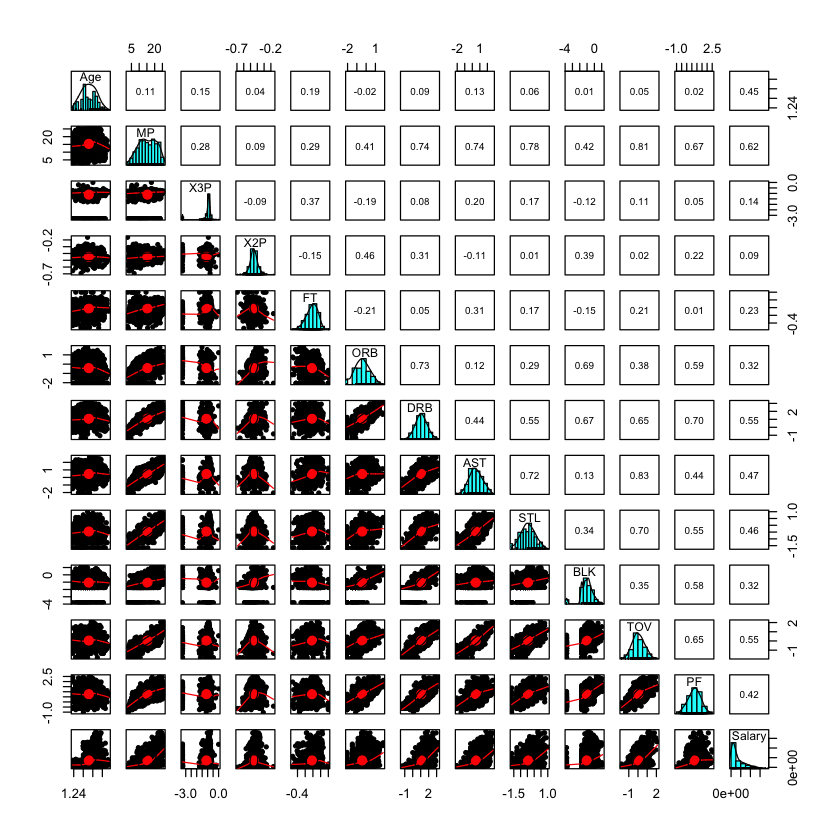

In [2]:
library(psych)
# check for multicollinearity
pairs.panels(players.normalized, smooth = TRUE, density = TRUE, ellipses = TRUE, method = 'spearman', cor = TRUE, alpha = 0.01)
# correlations are present for some variables

corrplot 0.92 loaded



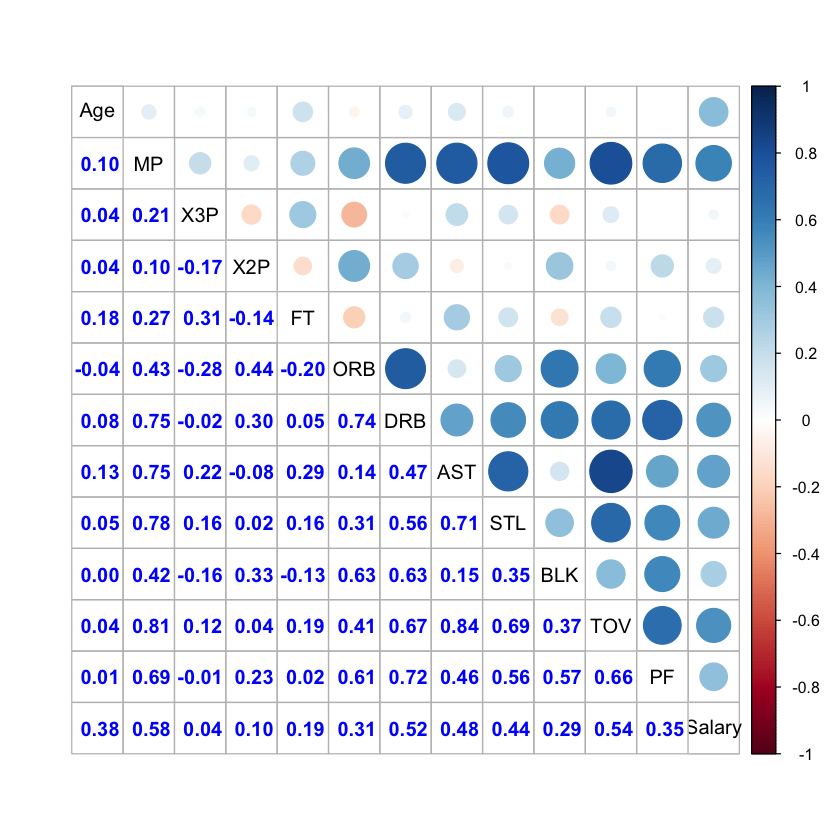

In [3]:
# check with correlation matrix
library(corrplot)
corrplot.mixed(cor(players.normalized), tl.col = "black", lower.col = 'blue')
# the correlation matrix suggests multicollinearity among some variables

In [4]:
# split data into training and validation (75/25)
install.packages('caret')
library(caret)
set.seed(40)
split_index <- createDataPartition(players.normalized$Salary, p = 0.75, list = F)
training_data <- players.normalized[split_index, ]
validation_data <- players.normalized[-split_index, ]

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Caricamento del pacchetto richiesto: ggplot2


Caricamento pacchetto: ‘ggplot2’


I seguenti oggetti sono mascherati da ‘package:psych’:

    %+%, alpha


Caricamento del pacchetto richiesto: lattice



A linear model is fitted on all predictor variables, to predict the response variable Salary. All predictors have been transformed to a more normal distribution in the preprocessing step; however, the response variable was not transformed, since a transformation could change the error distribution and alter the relationship between the predictors and the dependent variable. Furthermore, transforming the response variable would hinder the interpretability of the model.
According to the F-value, at least one predoctor is significant. Looking at the p-values (choosing a threshold of significance < 0.05), the most relevant features are Age, MP, DRB, TOV and PF. Analysis of Variance (ANOVA) identifies as relevant the above-mentioned attributes, together with X3P, ORB and AST.

In [5]:
# fit model on all predictors
model.lm <- lm(Salary ~ ., data = training_data)
summary(model.lm)
# from the F-test we can conclude that at least one of the predictors is significant


Call:
lm(formula = Salary ~ ., data = training_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-14558001  -3826210   -685231   2912769  20855738 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -202259600   15766694 -12.828  < 2e-16 ***
Age          158332749   12135866  13.047  < 2e-16 ***
MP              453344      78640   5.765 1.13e-08 ***
X3P            -792803     339830  -2.333 0.019877 *  
X2P           -3165277    3875749  -0.817 0.414329    
FT             3270032    2857808   1.144 0.252835    
ORB             255292     435212   0.587 0.557630    
DRB            1826797     547941   3.334 0.000892 ***
AST            -551156     480567  -1.147 0.251741    
STL             316202     590632   0.535 0.592535    
BLK             106160     299893   0.354 0.723429    
TOV            3413418     670170   5.093 4.31e-07 ***
PF            -2615297     502921  -5.200 2.48e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

In [6]:
# ANOVA
anova(model.lm)
# most relevant variables are Age, MP, X3P, TOV, PF, DRB, ORB and AST

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,7.068317e+15,7.068317e+15,240.67868803,3.910491e-48
MP,1,1.463603e+16,1.463603e+16,498.36187014,9.946239e-88
X3P,1,3.294848e+14,3.294848e+14,11.21907341,8.442231e-04
X2P,1,8.643042e+12,8.643042e+12,0.29429864,5.876171e-01
FT,1,2.499281e+13,2.499281e+13,0.85101386,3.565200e-01
ORB,1,2.239106e+14,2.239106e+14,7.62423676,5.879467e-03
DRB,1,4.974632e+14,4.974632e+14,16.93879811,4.225392e-05
AST,1,2.605351e+14,2.605351e+14,8.87131232,2.976848e-03
STL,1,6.475278e+11,6.475278e+11,0.02204855,8.819922e-01


In [7]:
# fit only relevant variables
model.2 <- lm(Salary ~ Age + MP + X3P + TOV + PF + DRB + ORB + AST, data = training_data)
anova(model.2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,7.068317e+15,7.068317e+15,241.1265324,3.102996e-48
MP,1,1.463603e+16,1.463603e+16,499.2892002,6.201232e-88
X3P,1,3.294848e+14,3.294848e+14,11.2399494,8.347421e-04
TOV,1,1.007927e+15,1.007927e+15,34.3841420,6.398566e-09
PF,1,4.006686e+14,4.006686e+14,13.6682935,2.316229e-04
DRB,1,7.435597e+14,7.435597e+14,25.3655823,5.755984e-07
ORB,1,5.462968e+12,5.462968e+12,0.1863621,6.660676e-01
AST,1,3.078525e+13,3.078525e+13,1.0501992,3.057432e-01
Residuals,879,2.576676e+16,2.931373e+13,NA,NA


In [8]:
# fit in a different order
model.3 <- lm(Salary ~ ORB + DRB + AST + Age + PF + MP + X3P + TOV, data = training_data)
anova(model.3)
# the extra sum of squares changes a lot depending on the position of the predictor variable (PF)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ORB,1,3.947123e+15,3.947123e+15,134.651033,4.572251e-29
DRB,1,1.011414e+16,1.011414e+16,345.030763,3.176309e-65
AST,1,3.032271e+15,3.032271e+15,103.442022,4.772535e-23
Age,1,4.630883e+15,4.630883e+15,157.976609,1.942503e-33
PF,1,1.366401e+14,1.366401e+14,4.661300,3.111980e-02
MP,1,1.397800e+15,1.397800e+15,47.684148,9.595309e-12
X3P,1,1.727507e+14,1.727507e+14,5.893168,1.539963e-02
TOV,1,7.906269e+14,7.906269e+14,26.971218,2.567209e-07
Residuals,879,2.576676e+16,2.931373e+13,NA,NA


By fitting a second model and performing an ANOVA analysis, the last variables to be fitted (ORB and AST) are deemed less relevant. However, by changing the order in which the variables are fitted, the significance of the attributes changes, which suggests multicollinearity.

In [9]:
# multicollinearity diagnostics
cov2cor(vcov(model.lm)) # large absolute value between TOV and AST


Xsl <- model.matrix(model.lm)[, -1]
lambda <- eigen(cor(Xsl))$values
sqrt(lambda[1]/lambda)

# variance inflation factor (VIF)
vif <- diag(solve(cor(Xsl)))
vif
max(vif)
mean(vif)
# mean of VIF is larger than 1, but highest VIF is not larger than 10:
# not so strong multicollinearity

,(Intercept),Age,MP,X3P,X2P,FT,ORB,DRB,AST,STL,BLK,TOV,PF
(Intercept),1.000000000,-0.98740262,-0.09228377,0.017602464,0.211364004,0.191772267,-0.08228071,0.08958374,0.142242607,0.02274656,0.03882280,-0.102785543,0.003335394
Age,-0.987402619,1.00000000,0.01530700,0.025519700,-0.098748504,-0.128929089,0.09910144,-0.11797070,-0.147947512,0.03741763,-0.02357419,0.143342176,-0.020162476
MP,-0.092283765,0.01530700,1.00000000,-0.180843494,-0.048979255,-0.194838745,0.04279571,-0.36886700,-0.224310510,-0.38526788,0.02862576,-0.100220479,-0.198920436
X3P,0.017602464,0.02551970,-0.18084349,1.000000000,0.024642074,-0.110259163,0.23706628,-0.06601865,0.020813987,0.01404815,0.07264436,0.036841618,-0.007652712
X2P,0.211364004,-0.09874850,-0.04897925,0.024642074,1.000000000,0.061835397,-0.23224178,-0.03507118,0.001194727,0.07327517,-0.12951625,0.090351400,-0.009861519
FT,0.191772267,-0.12892909,-0.19483875,-0.110259163,0.061835397,1.000000000,0.16723560,-0.05486890,-0.056735325,0.11287874,0.07668505,0.001562895,0.023766028
ORB,-0.082280707,0.09910144,0.04279571,0.237066282,-0.232241783,0.167235596,1.00000000,-0.51251159,0.152180291,0.01126227,-0.09484190,-0.063999953,-0.192188052
DRB,0.089583737,-0.11797070,-0.36886700,-0.066018650,-0.035071181,-0.054868903,-0.51251159,1.00000000,0.067632718,0.04883103,-0.22679088,-0.170417127,-0.033564202
AST,0.142242607,-0.14794751,-0.22431051,0.020813987,0.001194727,-0.056735325,0.15218029,0.06763272,1.000000000,-0.26160847,0.13984665,-0.661382755,0.126782592
STL,0.022746562,0.03741763,-0.38526788,0.014048154,0.073275169,0.112878736,0.01126227,0.04883103,-0.261608467,1.00000000,-0.13982295,0.038499315,-0.048316409


[1] 1.000000 1.499139 2.183517 2.494938 2.755262 2.942675 3.442630 3.915173
 [9] 4.007105 5.263084 6.433750 7.085539

Age       MP      X3P      X2P       FT      ORB      DRB      AST 
1.090225 5.704594 1.267497 1.384179 1.345156 3.471133 4.970507 5.246184 
     STL      BLK      TOV       PF 
2.817802 2.009517 5.840273 2.728264

[1] 5.840273

[1] 3.156278

By looking at the correlation matrix, it is indeed evident that some variables are correlated, however, the Variance Inflation Factor (VIF) doesn’t indicate the presence of strong multicollinearity (maximum = 5.840, mean = 3.138). Nevertheless, reducing the variables on which the model is fitted can be beneficial both to avoid multicollinearity and to build a simpler model. Therefore, we look at all the possible subsets of models and evaluate the R2-value and the Ra2.

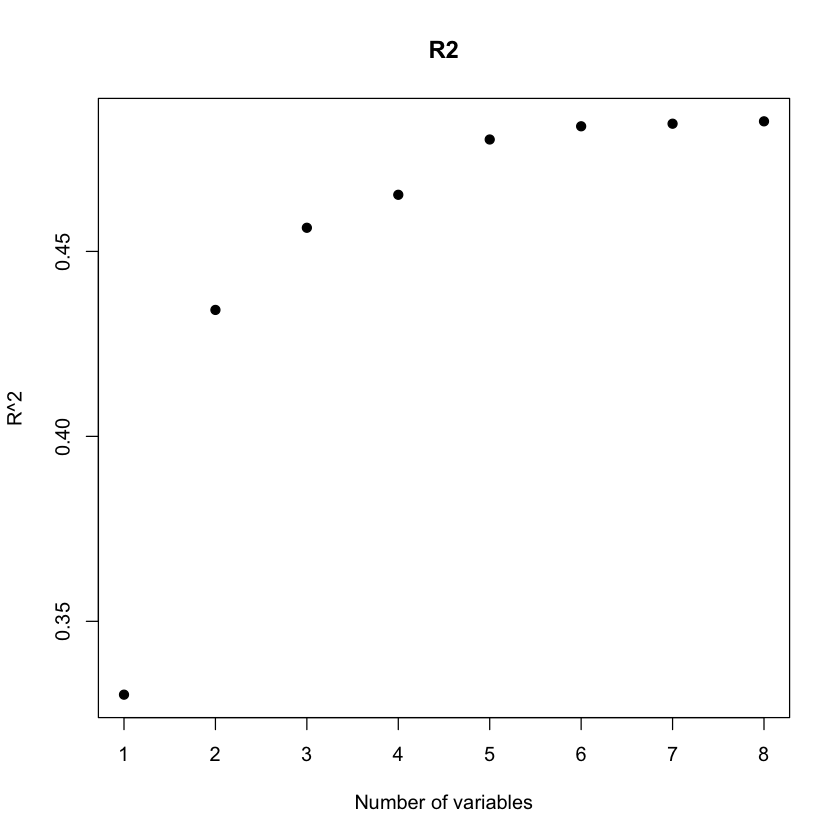

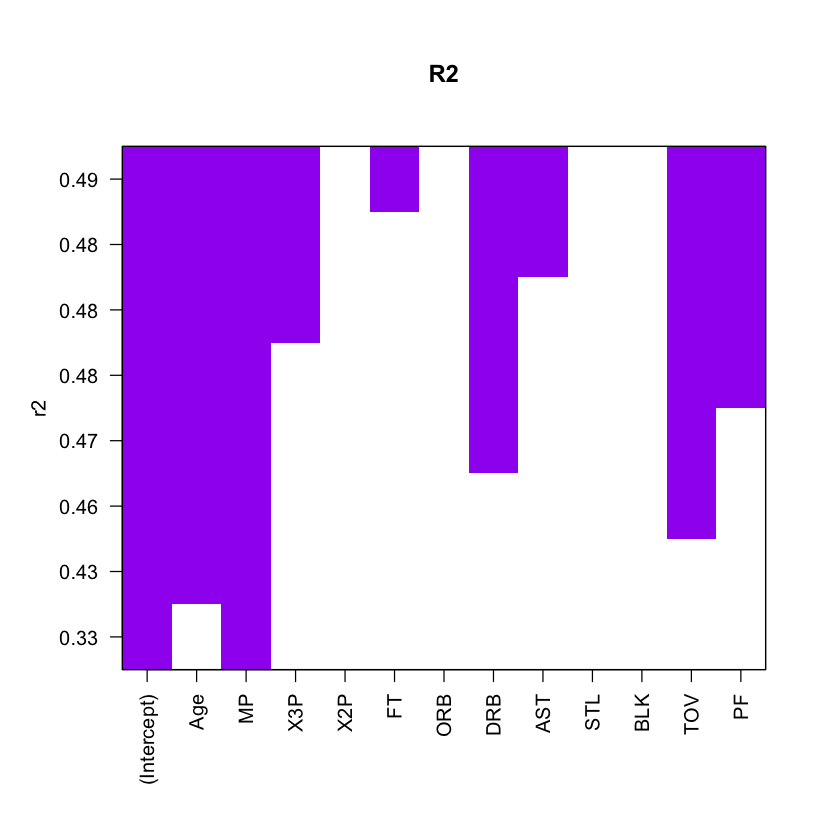

In [10]:
# R^2
library(leaps)
subs <- regsubsets(Salary ~ ., data = training_data, nbest = 1)
numvar <- as.numeric(row.names(summary(subs)$which))
rsq <- summary(subs)$rsq
plot(numvar, rsq, pch = 19, xlab = 'Number of variables', ylab = 'R^2', main = 'R2')
plot(subs, scale = 'r2', col = 'purple', main = 'R2')
# best number of variables is 5 or 6
# PF, TOV, X3P, MP, Age, AST (same as ANOVA)

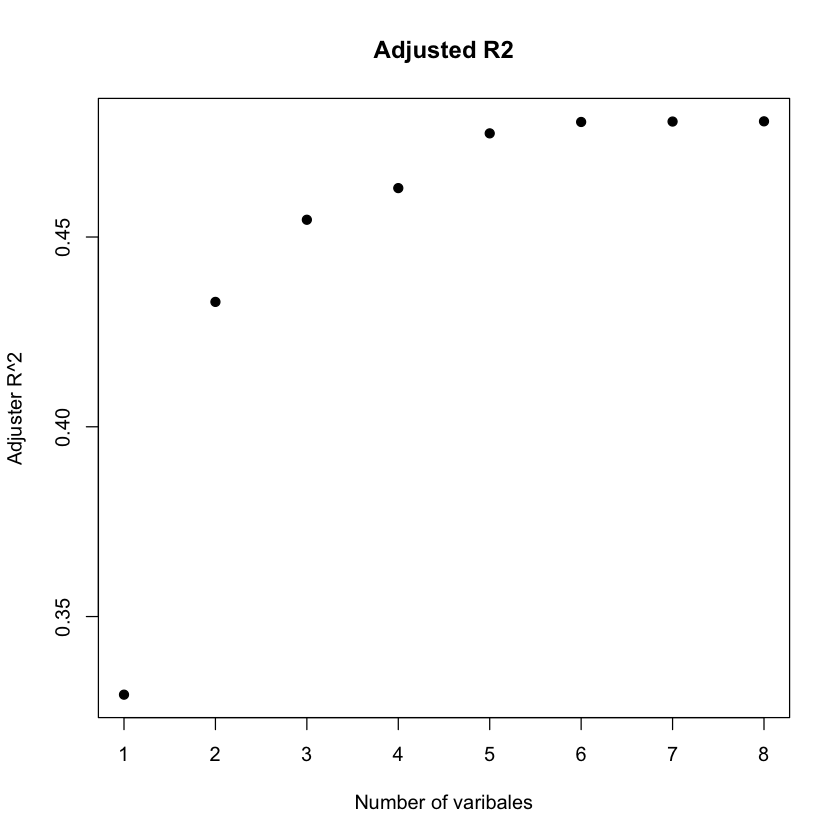

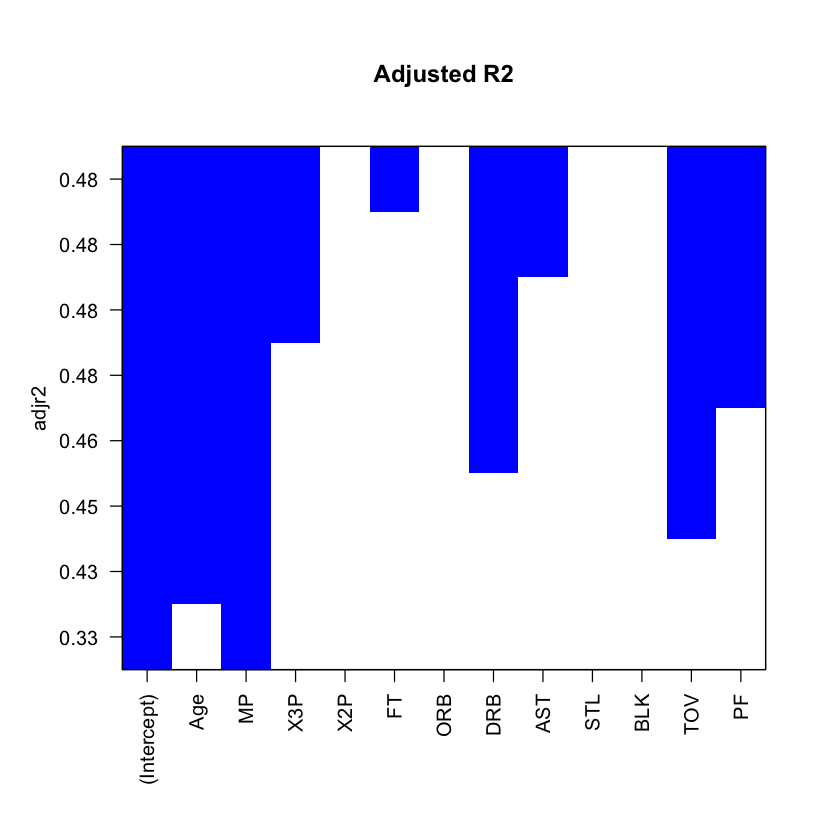

In [11]:
# Adjusted R^2
adjrsq <- summary(subs)$adjr2
plot(numvar, adjrsq, pch = 19, xlab = 'Number of varibales', ylab = 'Adjuster R^2', main = 'Adjusted R2')
plot(subs, scale = 'adjr2', col = 'blue', main = 'Adjusted R2')
# also 5 or 6 variables: same as before

According to both R2 and Ra2, the variables which should be retained are Age, MP, DRB, TOV and PF.

In [12]:
# AIC
model.initial <- lm(Salary ~ 1, data = training_data)
model.full <- lm(Salary ~ ., data = training_data)
library(MASS)
model.step <- stepAIC(model.initial, list(upper = model.full, lower = model.initial), direction = 'both')
# Retain Age, MP, TOV, PF, DRB, X3P

Start:  AIC=28117.51
Salary ~ 1

       Df  Sum of Sq        RSS   AIC
+ MP    1 1.6505e+16 3.3484e+16 27764
+ TOV   1 1.4419e+16 3.5570e+16 27817
+ DRB   1 1.3031e+16 3.6958e+16 27851
+ AST   1 1.2007e+16 3.7982e+16 27876
+ STL   1 1.0078e+16 3.9911e+16 27920
+ Age   1 7.0683e+15 4.2921e+16 27984
+ PF    1 6.2034e+15 4.3786e+16 28002
+ ORB   1 3.9471e+15 4.6042e+16 28046
+ BLK   1 3.6910e+15 4.6298e+16 28051
+ FT    1 2.3730e+15 4.7616e+16 28076
+ X2P   1 4.5766e+14 4.9531e+16 28111
<none>               4.9989e+16 28118
+ X3P   1 1.0851e+14 4.9880e+16 28118

Step:  AIC=27763.65
Salary ~ MP

       Df  Sum of Sq        RSS   AIC
+ Age   1 5.1993e+15 2.8285e+16 27616
+ DRB   1 8.3082e+14 3.2653e+16 27743
+ TOV   1 8.2237e+14 3.2662e+16 27744
+ AST   1 3.5921e+14 3.3125e+16 27756
+ X3P   1 2.6260e+14 3.3221e+16 27759
+ FT    1 1.4597e+14 3.3338e+16 27762
+ ORB   1 1.1709e+14 3.3367e+16 27762
+ PF    1 1.0989e+14 3.3374e+16 27763
+ BLK   1 8.9853e+13 3.3394e+16 27763
<none>               

Using Akaike’s information criterion (AIC) to select the variables yields a similar result: the variables to retain are indicated to be Age, MP, TOV, PF, DRB and X3P.


Call:
lm(formula = Salary ~ Age + MP + TOV + PF + DRB + X3P, data = training_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-14529792  -3946226   -715039   3020145  21058135 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -199945535   14848928 -13.465  < 2e-16 ***
Age          156376631   11707202  13.357  < 2e-16 ***
MP              449573      65270   6.888 1.08e-11 ***
TOV            2968621     483340   6.142 1.23e-09 ***
PF            -2468639     467187  -5.284 1.59e-07 ***
DRB            2062639     409367   5.039 5.69e-07 ***
X3P            -790513     320233  -2.469   0.0138 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5412000 on 881 degrees of freedom
Multiple R-squared:  0.4838,	Adjusted R-squared:  0.4803 
F-statistic: 137.6 on 6 and 881 DF,  p-value: < 2.2e-16


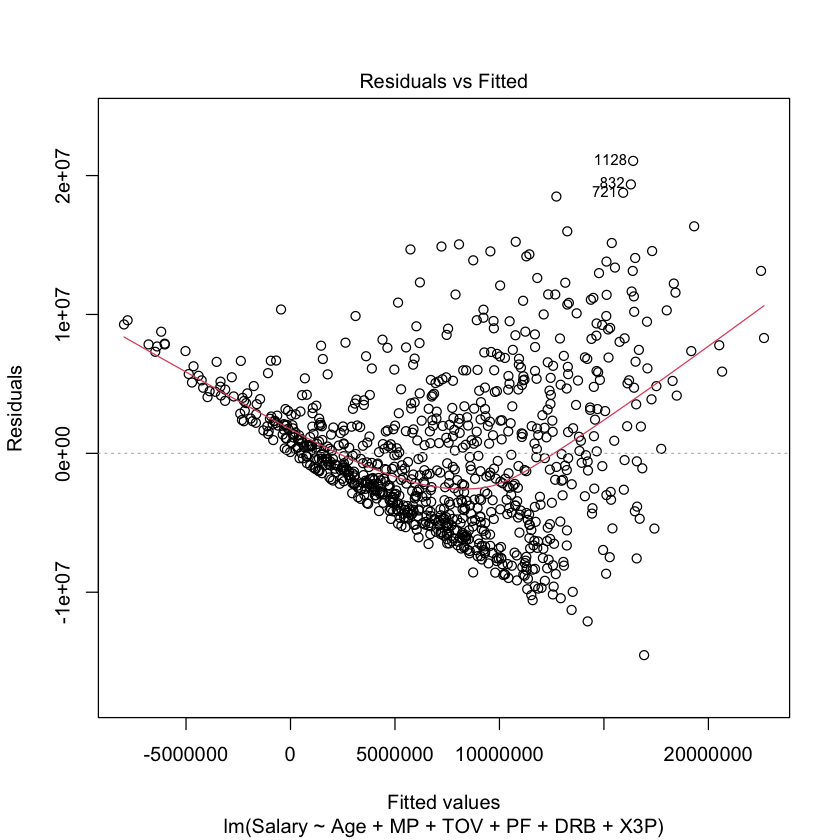

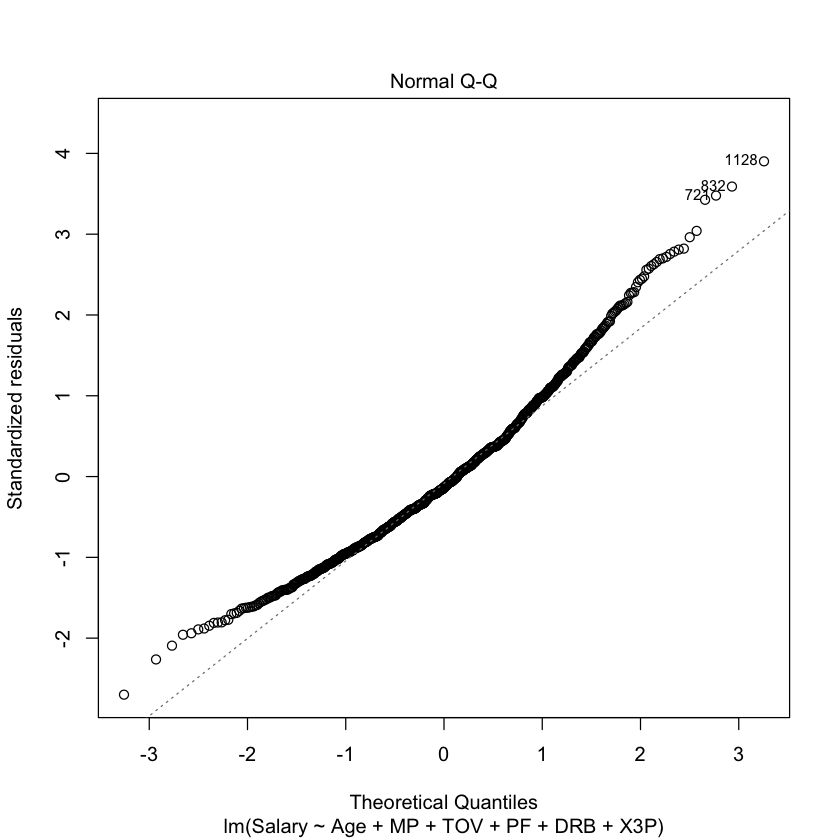

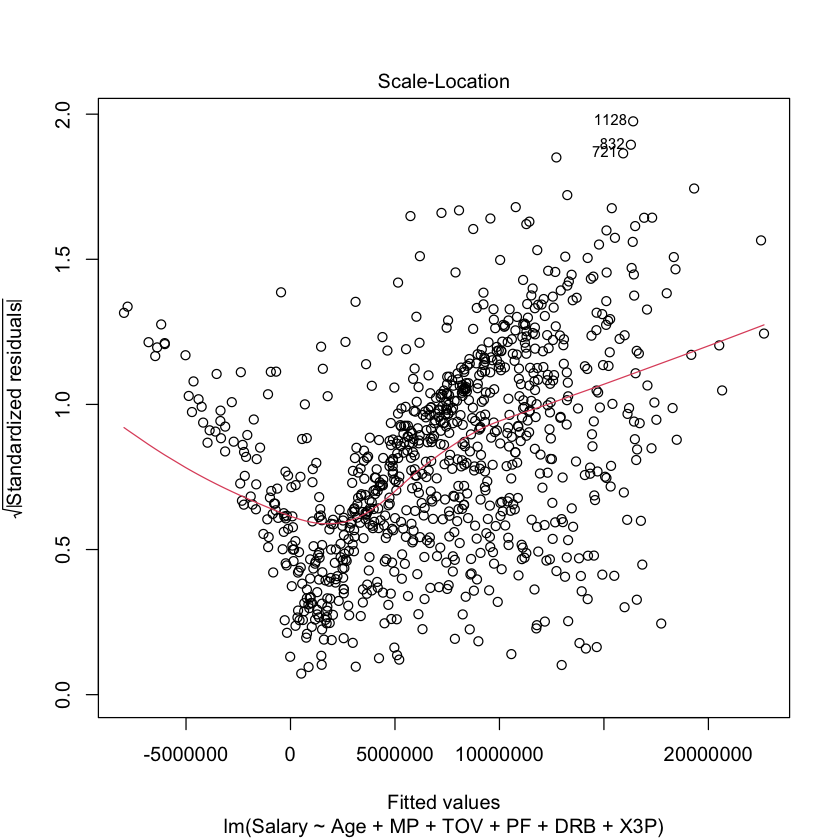

[1] 2.379219

[1] 3.940559

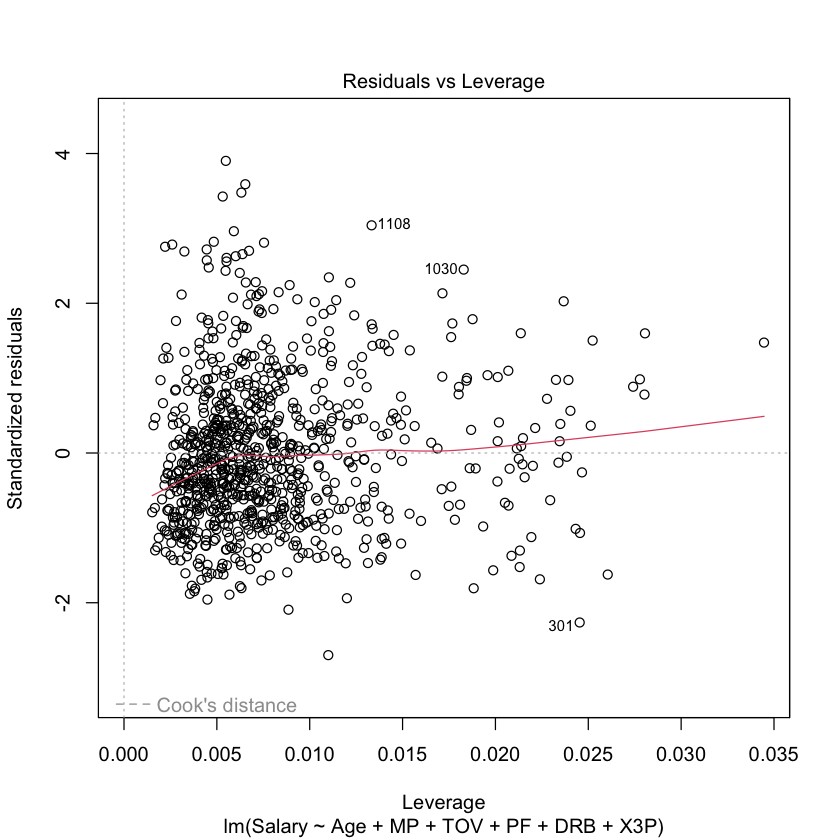

In [13]:
model.4 <- lm(Salary ~ Age + MP + TOV + PF + DRB + X3P, data = training_data)
summary(model.4)
plot(model.4)
# check multicollinearity with VIF
Xsl <- model.matrix(model.4)[, -1]
vif <- diag(solve(cor(Xsl)))
mean(vif)
max(vif)
# not so large multicollinearity: average > 1, but no value > 10

Checking for multicollinearity, the model doesn’t suffer from strong multicollinearity, although variables such as TOV and MP are correlated.

In [14]:
# model evaluation

# train model on full dataset
model.4 <- lm(Salary ~ Age + MP + TOV + PF + DRB + X3P, data = players.normalized)
# R^2 of LS residuals on full dataset
summary(model.4)$r.squared

# RMSE
n <- nrow(model.matrix(model.4))
rmse <- sqrt(deviance(model.4)/n)
cat("RMSE:", rmse, "\n")
deviance(model.4) - sum(resid(model.4)^2) # check

# AIC (without constant)
print('AIC')
extractAIC(model.4)

# train model on training set
model.train <- lm(Salary ~ Age + MP + TOV + PF + DRB + X3P, data = training_data)

# RMSE on the training set
ntr <- nrow(model.matrix(model.train))
rmse <- sqrt(deviance(model.train)/ntr)
cat("RMSE on training set:", rmse, "\n")

# RMSEP on the validation set
preds <- predict(model.train, newdata = validation_data)
rmse.val <- RMSE(validation_data$Salary, preds)
cat("RMSEP:", rmse.val, "\n")

[1] 0.4955325

RMSE: 5321347 


[1] 0

[1] "AIC"


[1]     7.00 36594.85

RMSE on training set: 5390496 
RMSEP: 5115062 


By adding interaction terms, we notice that the explained sum of squares doesn't increase much, whereas the VIF (variance inflation factor) indicates the presence of multicollinearity.


Call:
lm(formula = Salary ~ Age + MP + TOV + PF + DRB + X3P + TOV * 
    MP + PF * TOV, data = players.normalized)

Residuals:
      Min        1Q    Median        3Q       Max 
-14323570  -3382235   -384779   2914678  19267343 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -202066131   11986870 -16.857  < 2e-16 ***
Age          156901343    9440896  16.619  < 2e-16 ***
MP              396705      54523   7.276 6.28e-13 ***
TOV           -6077980     831714  -7.308 5.01e-13 ***
PF            -1378142     387818  -3.554 0.000395 ***
DRB            2584416     334212   7.733 2.25e-14 ***
X3P            -477983     247936  -1.928 0.054116 .  
MP:TOV          632851      60499  10.461  < 2e-16 ***
TOV:PF        -2289651     516386  -4.434 1.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5039000 on 1172 degrees of freedom
Multiple R-squared:  0.551,	Adjusted R-squared:  0.5479 
F-statistic: 179.8 o

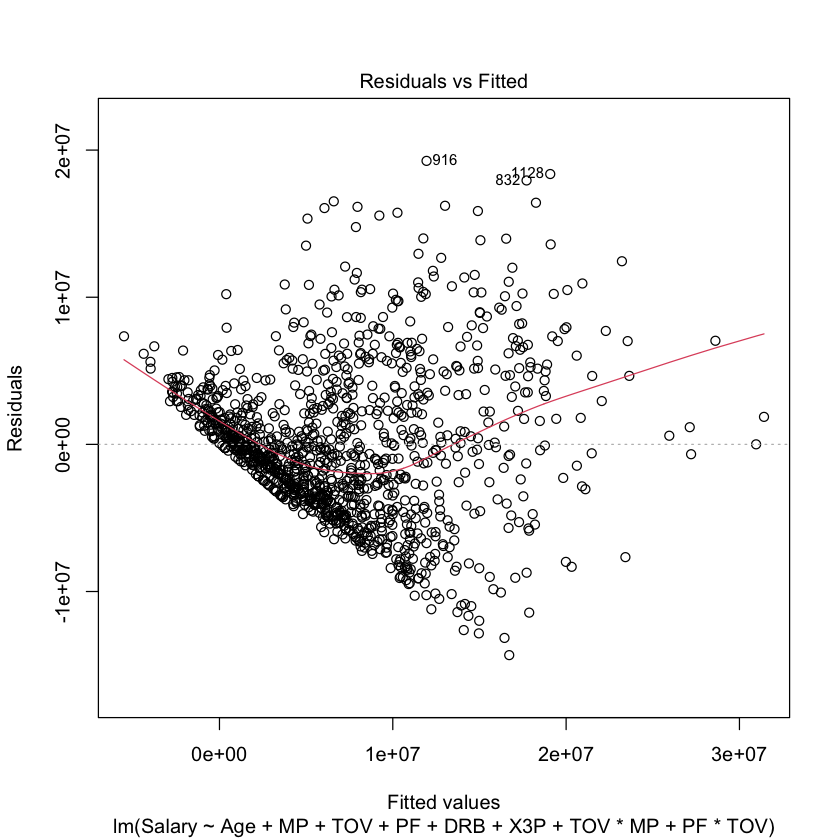

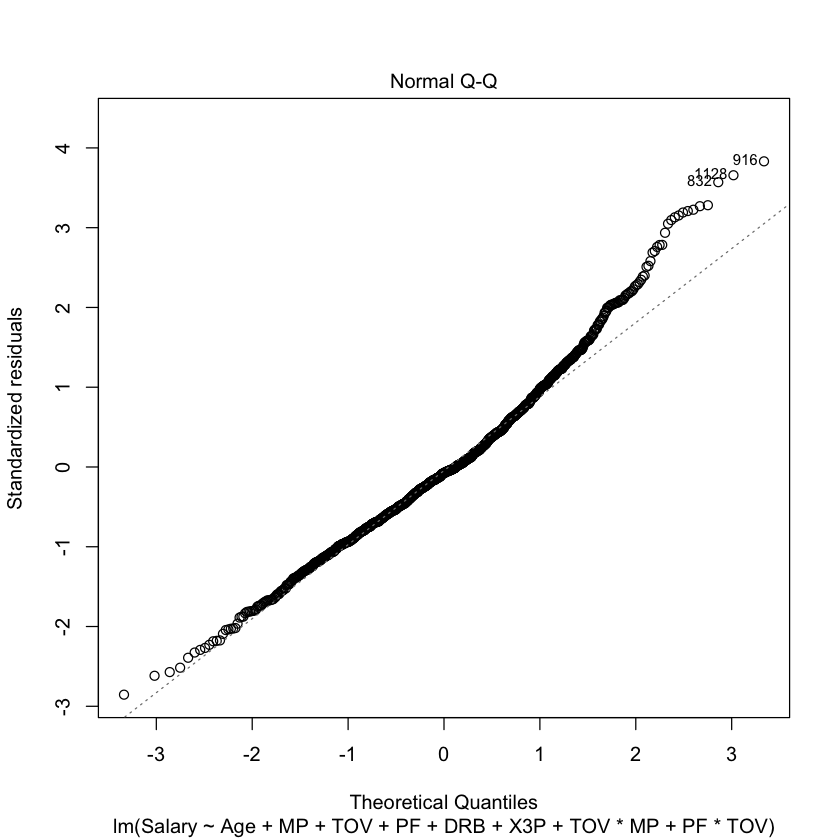

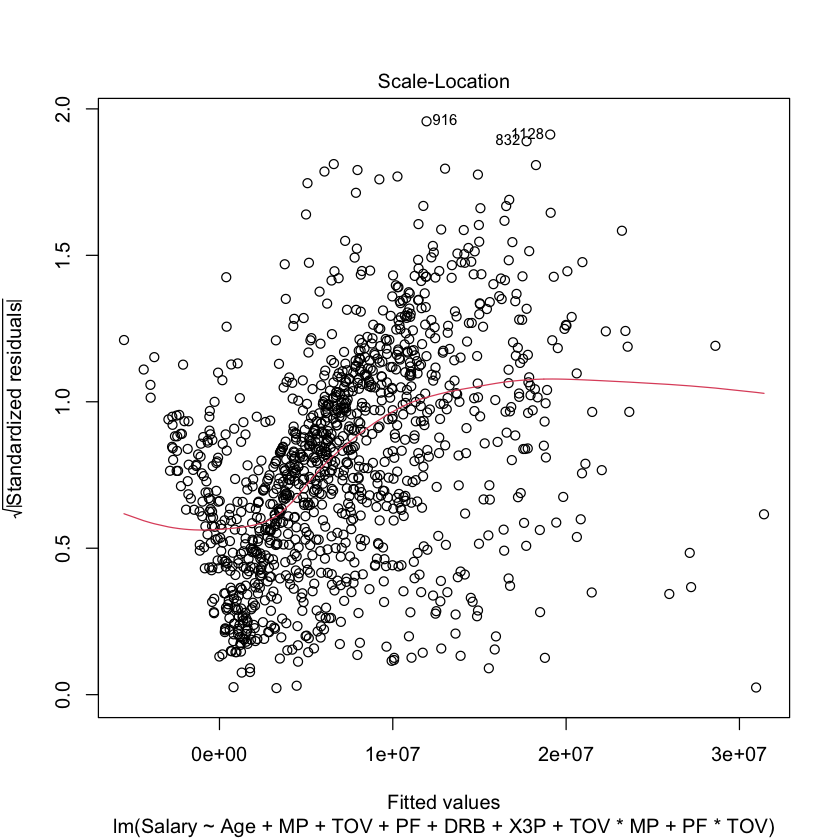

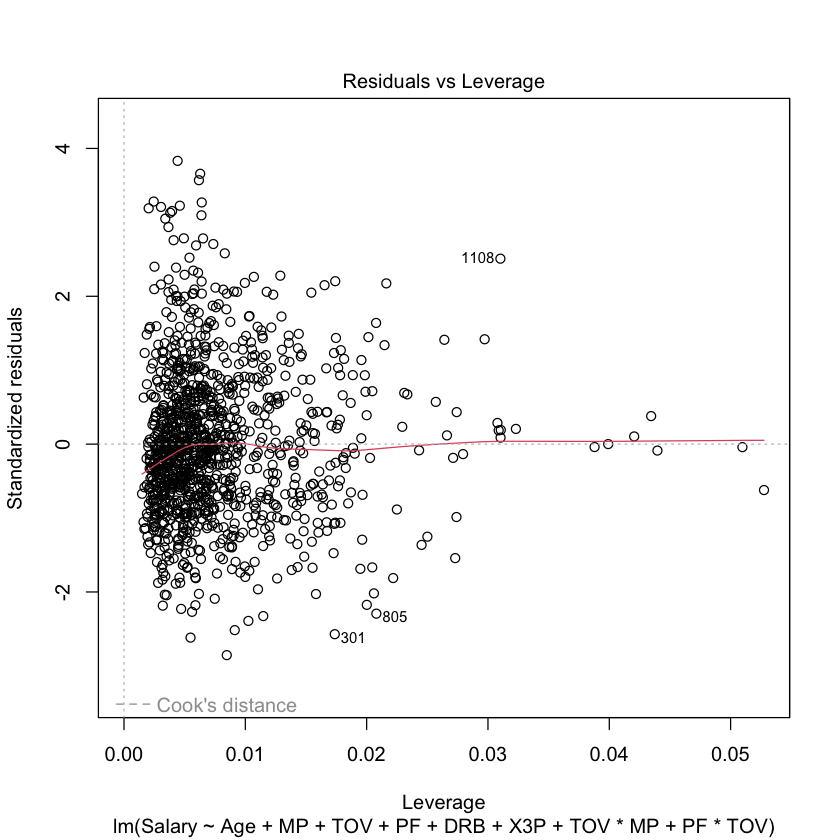

In [15]:
# add interaction terms
model.5 <- lm(Salary ~ Age + MP + TOV + PF + DRB + X3P + TOV*MP + PF*TOV, data = players.normalized)

summary(model.5)
plot(model.5)

In [16]:
# check multicollinearity with VIF
Xsl <- model.matrix(model.5)[, -1]
vif <- diag(solve(cor(Xsl)))
mean(vif)
max(vif)
# multicollinearity detected: max(vif) = 20.97729

[1] 6.580007

[1] 20.97729

In [17]:
# model evaluation
# R^2 of LS residuals on the full dataset
r.sq <- summary(model.5)$r.squared
cat("R squared:", r.sq, "\n")

# RMSE of the full dataset
n <- nrow(model.matrix(model.5))
rmse <- sqrt(deviance(model.5)/n)
cat("RMSE:", rmse, "\n")
deviance(model.5) - sum(resid(model.5)^2) # check

# AIC on full dataset (without constant)
print('AIC')
extractAIC(model.5)

R squared: 0.5510082 
RMSE: 5020237 


[1] 0

[1] "AIC"


[1]     9.00 36461.27

Due to multicollinearity and the residual sum of squares, we proceed with a model without interaction terms.

In [18]:
# train model on training set
model.train.2 <- lm(Salary ~ Age + MP + TOV + PF + DRB + X3P, data = training_data)

In the next step, we verify the assumptions of the linear regression model. The assumptions to satisfy are the linear assumptions and the Gauss-Markov conditions: normal distribution of the errors, homoscedasticity of the errors and independence of the observations.
Since the variables are not univariate, bivariate and multivariate normally distributed (which would be a sufficient, though not necessary, condition for the errors to be normally distributed), we can't assume that the errors are normally distributed. Therefore, we check the normality of the errors.


Call:
lm(formula = Salary ~ Age + MP + TOV + PF + DRB + X3P, data = training_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-14529792  -3946226   -715039   3020145  21058135 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -199945535   14848928 -13.465  < 2e-16 ***
Age          156376631   11707202  13.357  < 2e-16 ***
MP              449573      65270   6.888 1.08e-11 ***
TOV            2968621     483340   6.142 1.23e-09 ***
PF            -2468639     467187  -5.284 1.59e-07 ***
DRB            2062639     409367   5.039 5.69e-07 ***
X3P            -790513     320233  -2.469   0.0138 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5412000 on 881 degrees of freedom
Multiple R-squared:  0.4838,	Adjusted R-squared:  0.4803 
F-statistic: 137.6 on 6 and 881 DF,  p-value: < 2.2e-16


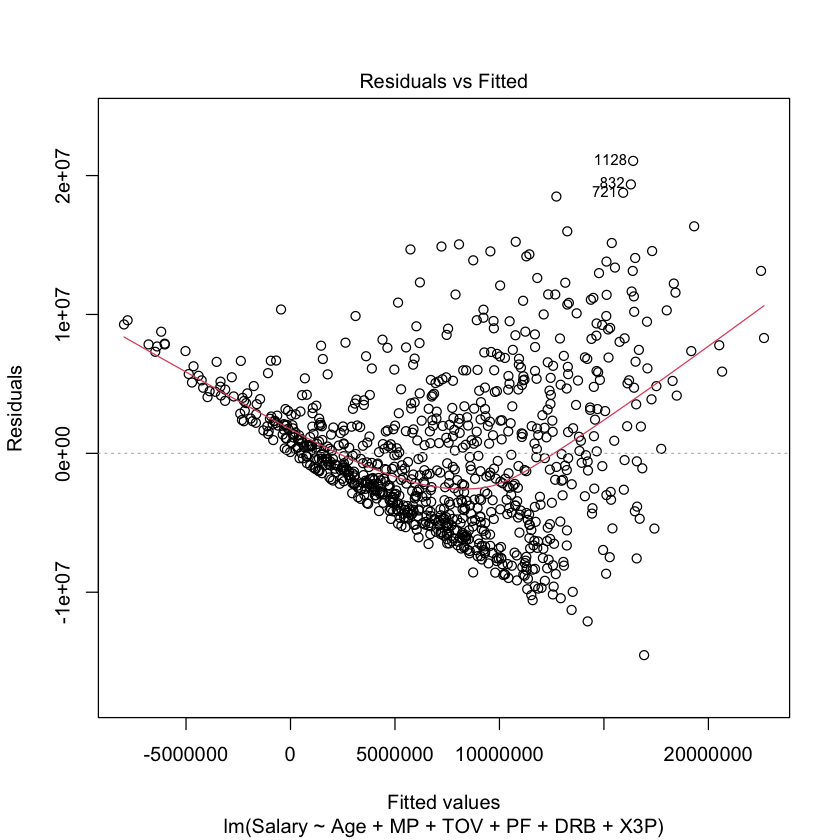

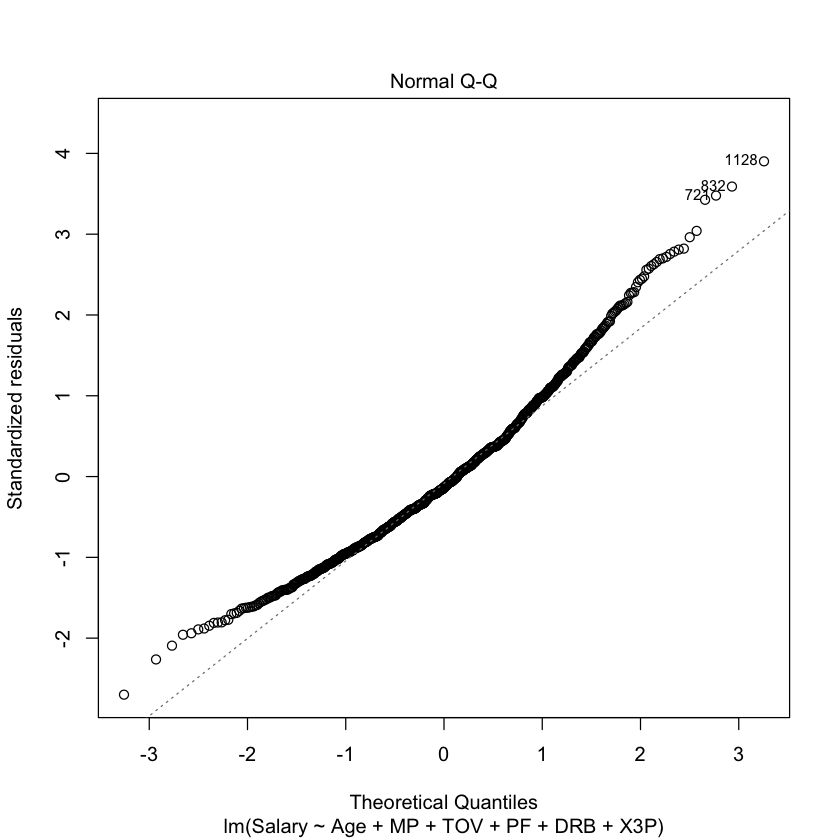

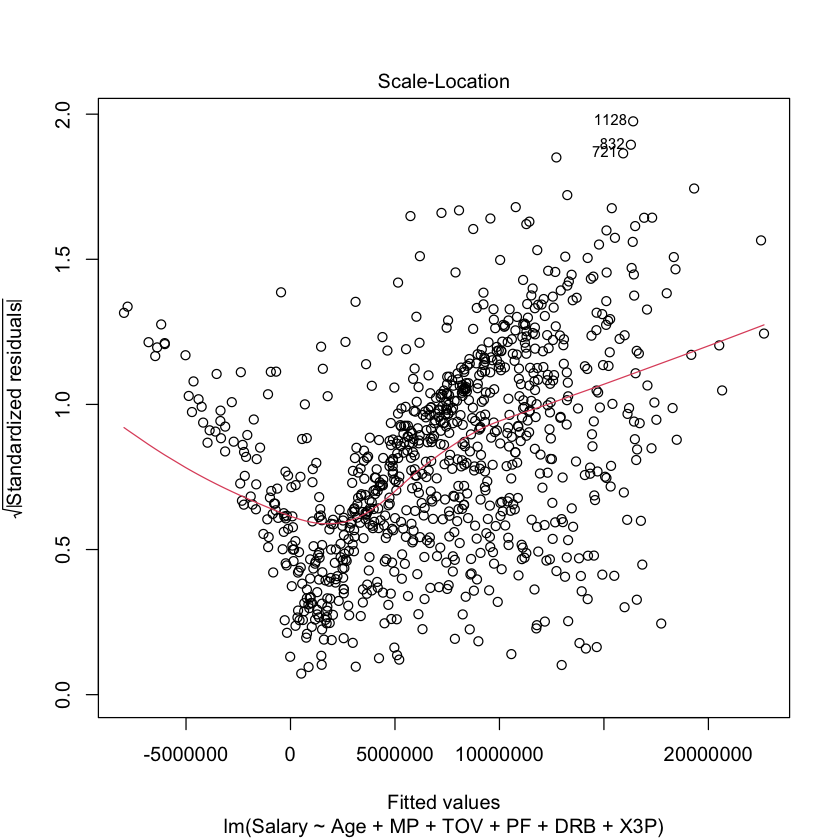

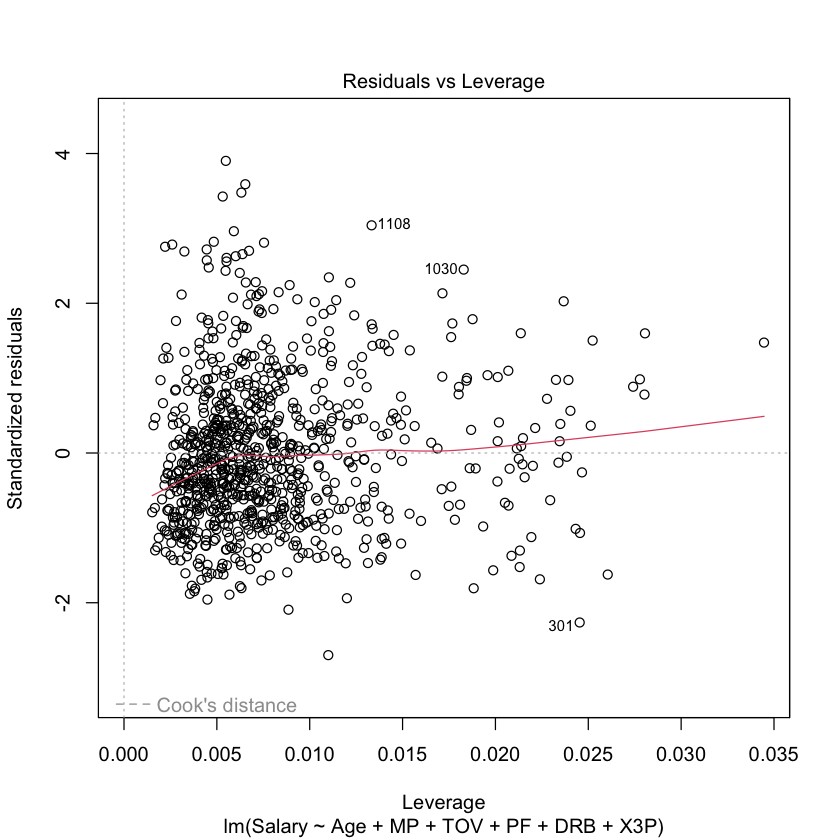

In [19]:
summary(model.train.2)
plot(model.train.2)
# Residuals vs fitted plot

Visualizing a scatterplot of the residuals and the fitted values, a deviation from the linear horizontal pattern indicates a deficit in the model’s assumptions. The error variance is not constant, suggesting heteroscedasticity. Furthermore, the linear assumption is not satisfied. On the other hand, the errors are almost normally distributed, as indicated by the normal Q-Q plot.

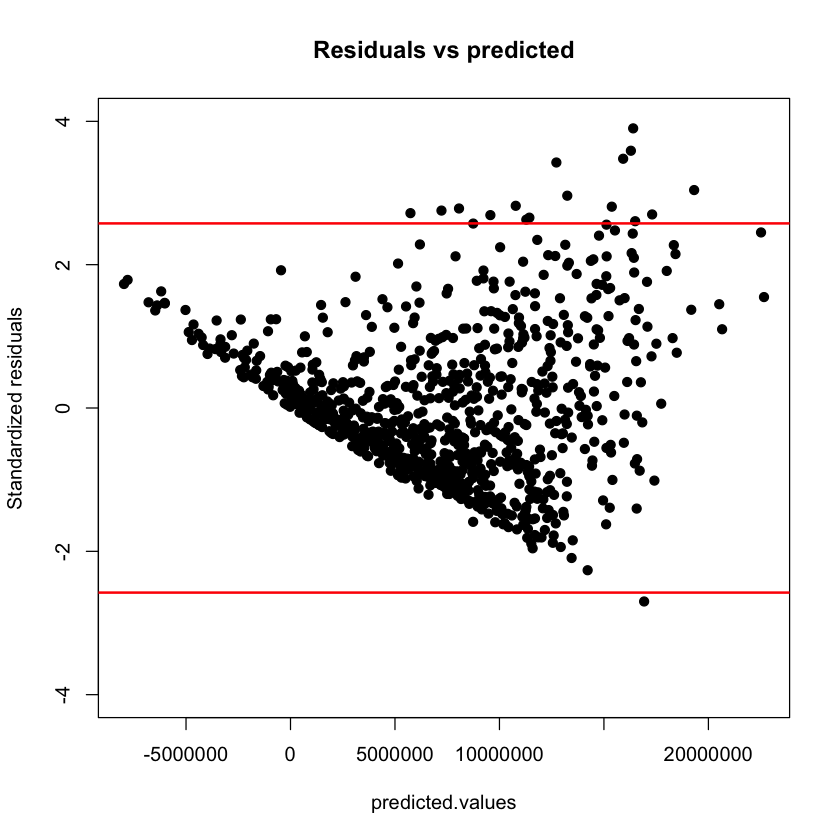

In [20]:
model.4.res <- stdres(model.train.2)
cutoff <- qnorm(0.995)
predicted.values <- predict.lm(model.train.2)
plot(predicted.values, model.4.res, pch=19, ylab="Standardized residuals", ylim = c(-4, 4), main = 'Residuals vs predicted')
abline(h=cutoff,col="red",lwd=2)
abline(h=-cutoff,col="red",lwd=2)
# residuals vs fitted plot: curvature in the data, not examined by model.4
# heteroscedasticity: variability in the response is changing as the predicted value increases

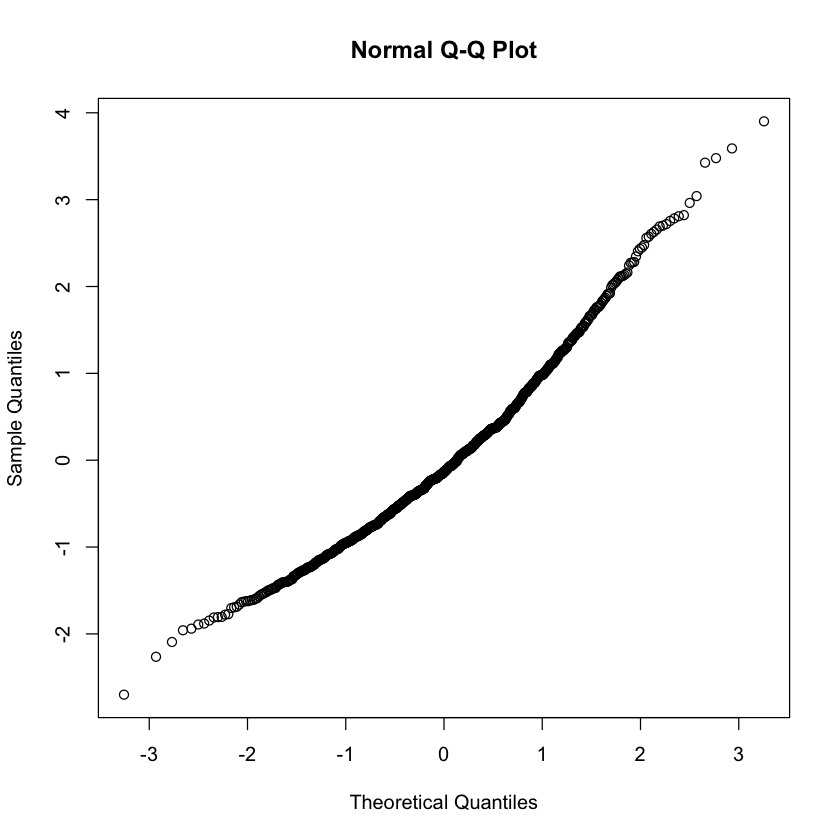

In [21]:
qqnorm(model.4.res) # almost normal

Since the linear assumption is not satisfied, we transform the response variable with a simple transformation, taking the log, to improve linearity without hindering the model’s interpretability. 

Caricamento del pacchetto richiesto: carData


Caricamento pacchetto: ‘car’


Il seguente oggetto è mascherato da ‘package:psych’:

    logit




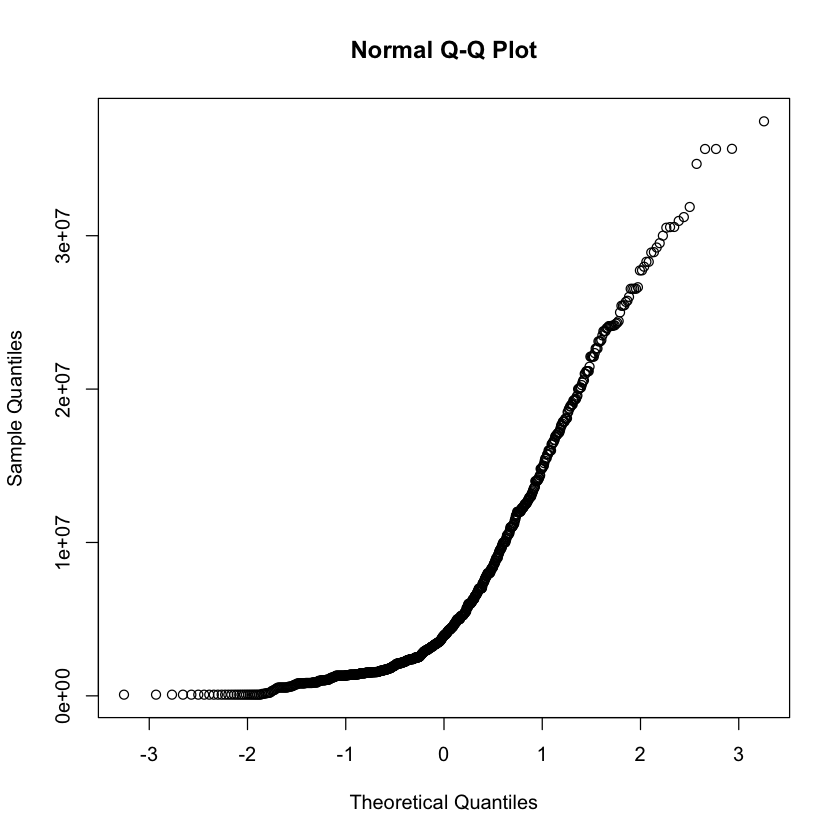

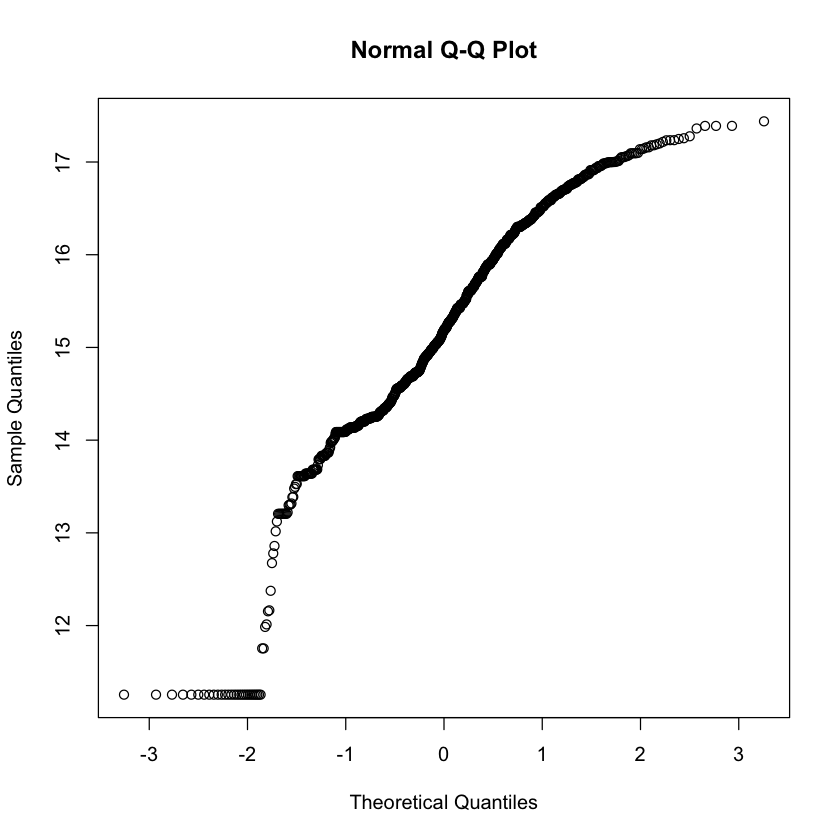

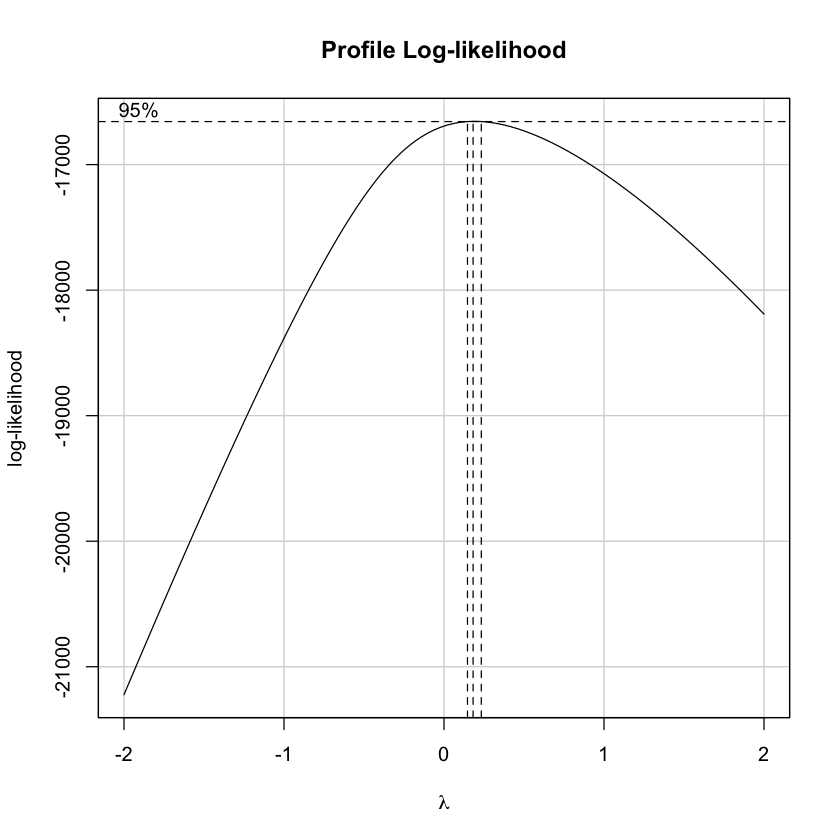

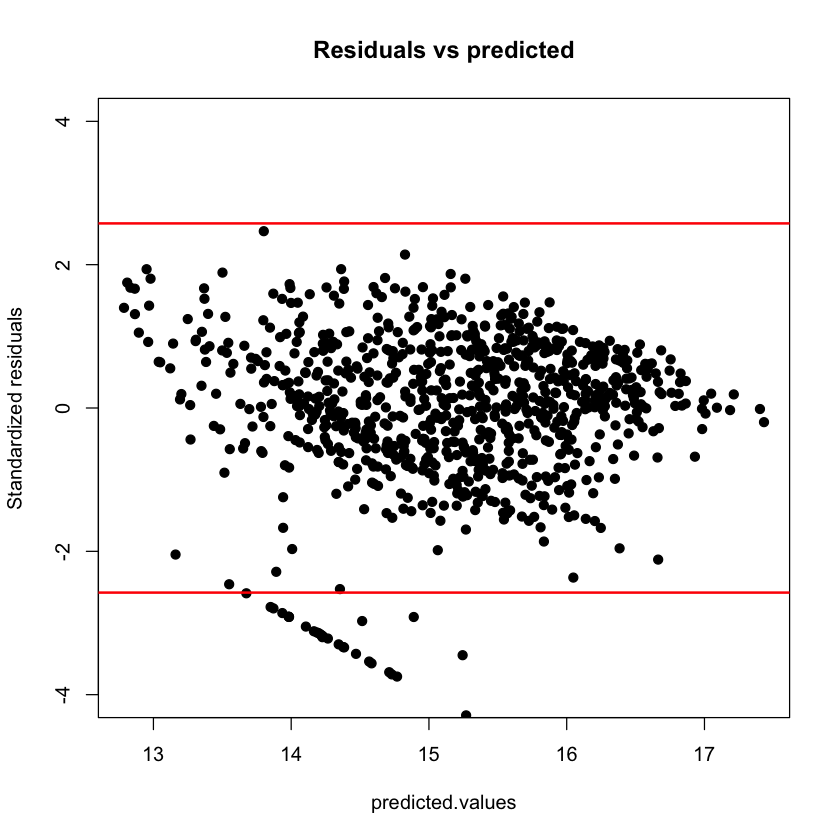

In [22]:
attach(training_data)
library(car)

# the main problem is heteroscedasticity
# take sqrt(Salary)
qqnorm(Salary)
qqnorm(log(Salary))
bcSalary <- boxCox(Salary ~ 1)
lambdaSalary <- bcSalary$x[which.max(bcSalary$y)]
model.log <- lm(log(Salary) ~ Age + MP + TOV + PF + DRB + X3P, data = training_data)
model.log.res <- stdres(model.log)
cutoff <- qnorm(0.995)
predicted.values <- predict.lm(model.log)
plot(predicted.values, model.log.res, pch=19, ylab="Standardized residuals", ylim = c(-4, 4), main = 'Residuals vs predicted')
abline(h=cutoff,col="red",lwd=2)
abline(h=-cutoff,col="red",lwd=2)

To handle outliers, to which the least squares estimator is sensitive, we use the Least Trimmed Squares (LTS) estimator, which tries to reduce the majority of the residuals, but not all of them. 

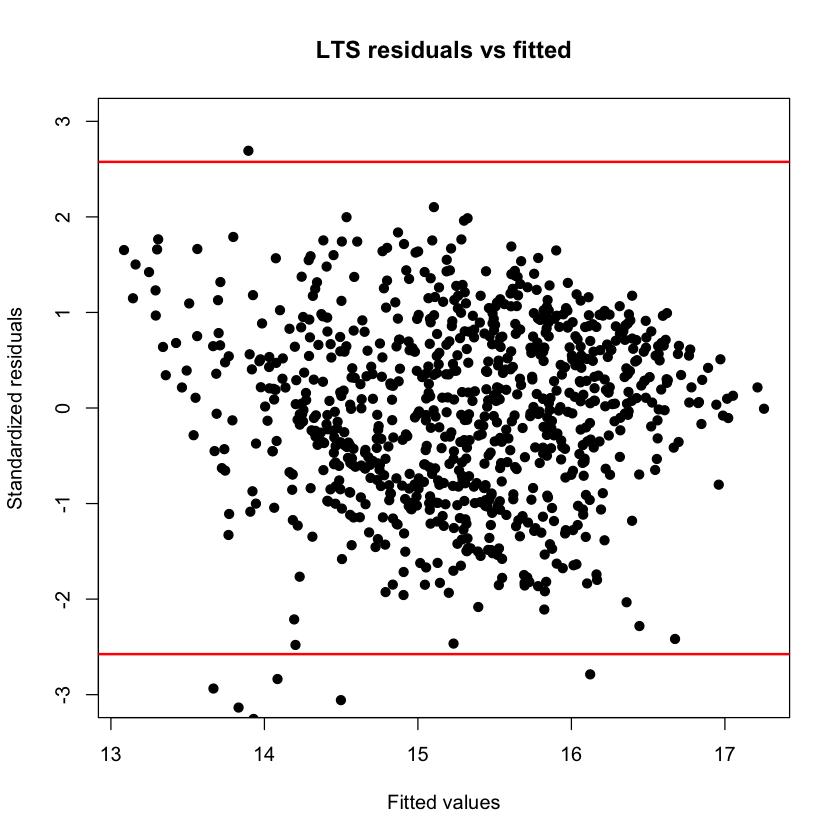

In [23]:
# least trimmed squares to handle outliers
library(robustbase)
model.rob <- ltsReg(log(Salary) ~ ., alpha = 0.75, data = training_data)
model.rob.res <- resid(model.rob)/model.rob$scale
cutoff <- qnorm(0.995)
outl.rob <- which(abs(model.rob.res) > cutoff)
plot(fitted(model.rob), model.rob.res, pch = 19, xlab = 'Fitted values', ylab = 'Standardized residuals', ylim = c(-3, 3), main = 'LTS residuals vs fitted')
abline(h = cutoff, col = 'red', lw = 2)
abline(h = - cutoff, col = 'red', lw = 2)

players.clean <- training_data[-outl.rob,]

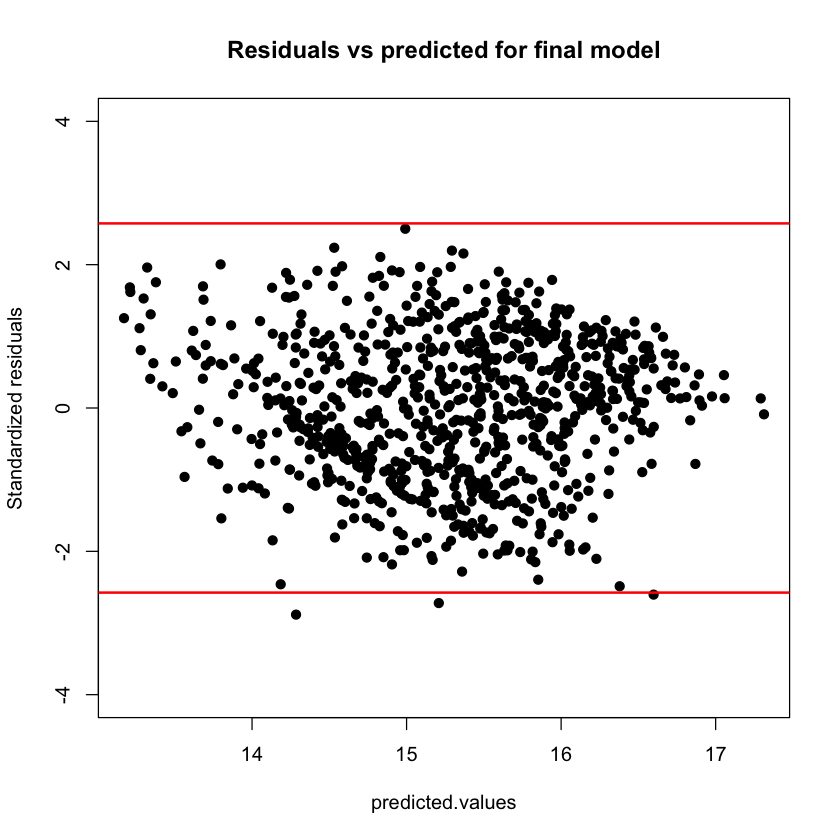

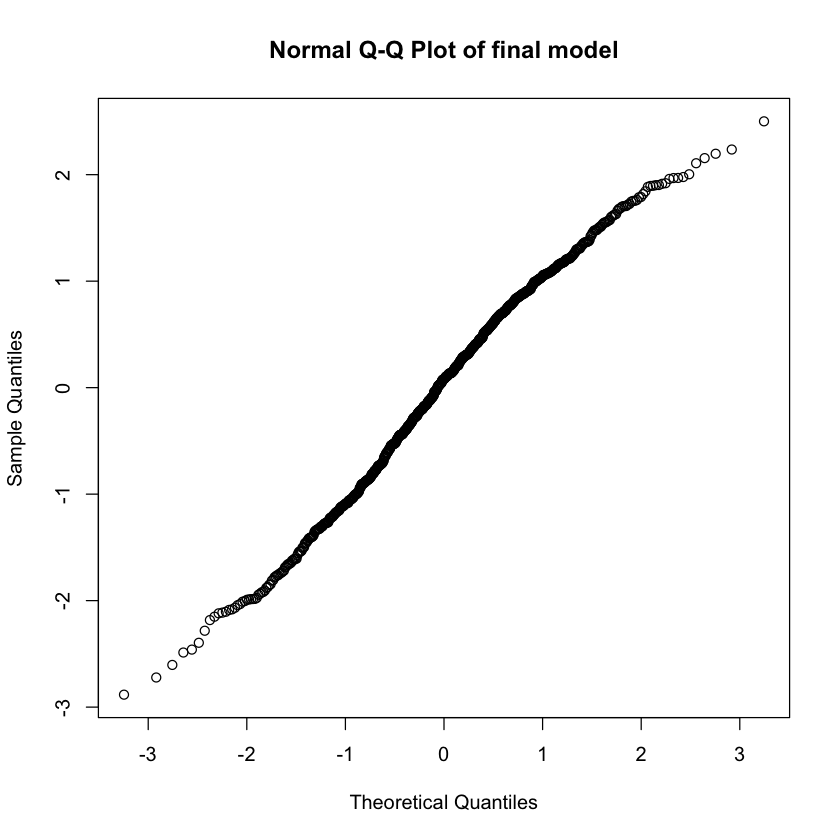

In [24]:
# fit model on cleaned data
model.log <- lm(log(Salary) ~ Age + MP + TOV + PF + DRB + X3P, data = players.clean)
model.log.res <- stdres(model.log)
cutoff <- qnorm(0.995)
predicted.values <- predict.lm(model.log)
plot(predicted.values, model.log.res, pch=19, ylab="Standardized residuals", ylim = c(-4, 4), main = 'Residuals vs predicted for final model')
abline(h=cutoff,col="red",lwd=2)
abline(h=-cutoff,col="red",lwd=2)

players.clean$Salary <- log(players.clean$Salary)
model.final <- lm(Salary ~ Age + MP + TOV + PF + DRB + X3P, data = players.clean)
model.final.res <- stdres(model.final)
par(mfrow = c(1, 1))
qqnorm(model.final.res, main = 'Normal Q-Q Plot of final model')

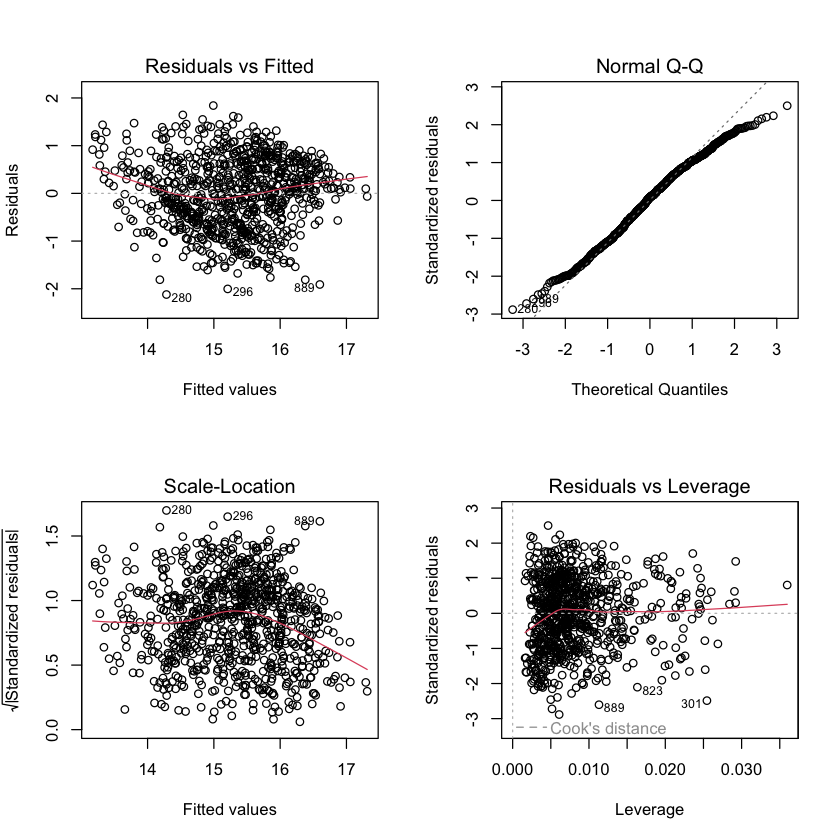

In [25]:
par(mfrow = c(2, 2))
plot(model.final)
# random pattern around 0, heteroscedasticity is no more present

Performing ANOVA on the final model yields a significant extra sum of squares (SSR) for all variables except PF, which means that, given Age, MP and TOV, adding PF to the model doesn’t reduce the error sum of squares. Furthermore, all variables have one degree of freedom, since there is no categorical variable employed in the model. Moreover, Age, MP, TOV, DRB and X3P have high F-values, indicating a high ratio of variance explained by the model over the variance not explained. Finally, the F-test indicates that all variables but PF contribute to explaining the variability in the response variable. As a consequence, removing PF wouldn’t significantly worsen the predictive power of the model.

In [26]:
# ANOVA
anova(model.final)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,1.683085e+02,1.683085e+02,3.092467e+02,3.084422e-59
MP,1,3.256241e+02,3.256241e+02,5.982952e+02,2.354890e-100
TOV,1,1.189714e+01,1.189714e+01,2.185956e+01,3.412895e-06
PF,1,3.275424e-04,3.275424e-04,6.018197e-04,9.804340e-01
DRB,1,1.073951e+01,1.073951e+01,1.973256e+01,1.008926e-05
X3P,1,3.841150e+00,3.841150e+00,7.057651e+00,8.041427e-03
Residuals,846,4.604383e+02,5.442533e-01,NA,NA


Evaluating the model on the training set yields R2 = 0. 0.5305717, Ra2 = 0.5272424, root mean squared error (RMSE) = 0.734702. On the validation set, the root mean squared error of prediction (RMSEP) = 0.968802.  Obviously, the RMSEP is larger than the RMSE on the training set, since the model has been trained on the training set, whereas it has not yet seen the instances of the validation set that it is trying to predict.

In [27]:
# R2 and adjusted R2 of final model on training set
model.final.train <- lm(Salary ~ Age + MP + TOV + PF + DRB + X3P, data = players.clean)

r.sq <- summary(model.final.train)$r.squared # R2 on training data
cat("R squared:", r.sq, "\n")
adj.r.sq <- summary(model.final.train)$adj.r.squared # adj R2 on training data
cat("Adjusted R squared:", adj.r.sq, "\n")
ntr <- nrow(model.matrix(model.final.train))
rmse <- sqrt(deviance(model.final.train)/ntr) # RMSE training data
cat("RMSE:", rmse, "\n")
pred.final <- predict(model.final.train, newdata = validation_data)
rmsep <- RMSE(log(validation_data$Salary), pred.final) # RMSEP on validation data
cat("RMSEP:", rmsep, "\n")
# higher RMSE on validation set obviously

R squared: 0.5305717 
Adjusted R squared: 0.5272424 
RMSE: 0.734702 
RMSEP: 0.968802 


Based on the final model, we compute a 99% confidence interval and prediction interval for the average Salary of a player with Age = 26, MP = 21.7, X3P. = 0.31, X2P. = 0.50, FT. = 0.75, ORB = 0.9, DRB = 3.0, AST = 2.1, STL = 0.7, BLK = 0.4, TOV = 1.2 and PF = 1.8. 
The model is re-trained on the whole dataset (without a training-validation split). Before feeding the new data to the model, the variables are transformed according to the same Cox-Box transformations that were used on the whole dataset. After obtaining the confidence interval for the mean response and the prediction interval for the unknown response, the transformation of the dependent variable is reversed, to obtain the predictions on the original scale. The prediction interval, as expected, is larger than the confidence interval, as it takes into account the variance of the errors.

In [28]:
# compute 99% confidence interval and prediction interval for average Salary
# of player with Age = 26, MP = 21.7, X3P. = 0.31, X2P. = 0.50, FT. = 0.75, ORB = 0.9, 
# DRB = 3.0, AST = 2.1, STL = 0.7, BLK = 0.4, TOV = 1.2 and PF = 1.8.

new_data <- data.frame(
  Age = 26, 
  MP = 21.7, 
  X3P = 0.31, 
  X2P = 0.50, 
  FT= 0.75, 
  ORB = 0.9, 
  DRB = 3.0, 
  AST = 2.1, 
  STL = 0.7, 
  BLK = 0.4, 
  TOV = 1.2, 
  PF = 1.8)

# load lambda values in memory from exploration.R
new_data$Age<- bcPower(new_data$Age, -0.7070707)
new_data$MP <- bcPower(new_data$MP, 0.8686869)
new_data$X3P <- new_data$X3P + 0.0000000000000000001
new_data$X3P <- bcPower(new_data$X3P, 0.3030303)
new_data$X2P <- bcPower(new_data$X2P, 1.353535)
new_data$FT <- bcPower(new_data$FT, 2)
new_data$ORB <- bcPower(new_data$ORB, 0.1010101)
new_data$DRB <- bcPower(new_data$DRB, 0.2222222)
new_data$AST <- bcPower(new_data$AST, 0.1010101)
new_data$STL <- bcPower(new_data$STL, 0.3030303)
new_data$BLK <- new_data$BLK + 0.0000000000000000001
new_data$BLK <- bcPower(new_data$BLK, 0.2222222)
new_data$TOV <- bcPower(new_data$TOV, 0.2222222)
new_data$PF <- bcPower(new_data$PF, 0.8282828)

model <- lm(log(Salary) ~ Age + MP + TOV + PF + DRB + X3P, data = players.normalized)
confs <- predict(model, newdata = new_data, interval = 'confidence', alpha = 0.99) # confidence interval
confs <- as.data.frame(confs)
# transform to the original values
cat("predicted value for confidence interval:", exp(confs$fit), "\n")
cat("lower bound for confidence interval:", exp(confs$lwr), "\n")
cat("upper bound for confidence interval:", exp(confs$upr), "\n")

preds <- predict(model, newdata = new_data, interval = 'prediction') # prediction interval
preds <- as.data.frame(preds)
cat("predicted value for prediction interval:", exp(preds$fit), "\n")
cat("lower bound for prediction interval:", exp(preds$lwr), "\n")
cat("upper bound for prediction interval:", exp(preds$upr), "\n")

predicted value for confidence interval: 4300077 
lower bound for confidence interval: 4043804 
upper bound for confidence interval: 4572591 
predicted value for prediction interval: 4300077 
lower bound for prediction interval: 678672.8 
upper bound for prediction interval: 27245326 
